In [10]:
import pickle
import gzip

def save_zipped_pickle(obj, filename, protocol=-1):
    with gzip.open(filename, 'wb') as f:
        pickle.dump(obj, f, protocol)
        
def load_zipped_pickle(filename):
    with gzip.open(filename, 'rb') as f:
        loaded_object = pickle.load(f)
        return loaded_object

In [11]:
import sys
sys.path.append('../Data')

import pandas as pd
import numpy as np
import time
from CommentDataset import CommentDataset

In [12]:
df = pd.read_csv("../Data/yahoo/2022_12_20/news_list_12_20_business_topic_500.csv", encoding="cp932", header=None)
comment_list = df[2][1:].to_numpy().tolist()
print(len(comment_list))
comment_dataset = CommentDataset(comment_list)
comment_dataset.delete_comment_specified_string(0)
print("a")
comment_dataset.formatted_input_hlda()
print("b")

475
a


KeyboardInterrupt: 

In [ ]:
def get_document_path(hlda, doc_index):
    node = hlda.document_leaves[doc_index]
    path = []
    while node is not None:
        path.append(node.node_id)
        node = node.parent
    path.reverse()
    return path

def get_document_path_list(hlda, corpus):
    document_path_list = []
    for i in range(len(corpus)):
        path = get_document_path(hlda, i)
        document_path_list.append(path)
    return document_path_list

def print_topic_document(corpus, path_list, topic_id):
    document_index_list = []
    for i, path in enumerate(path_list):
        if topic_id in path:
            document_index_list.append(i)
    if len(document_index_list) == 0:
        print(f"{topic_id}がみつかりません")
    for i in document_index_list:
        print(f"[{corpus[i]}]")
        print("\n")

In [ ]:
hlda = load_zipped_pickle('model/2022_12_20/yahoo_business_topic_500news_hlda_default.pickle')

In [44]:
hlda.print_nodes(n_words = 10, with_weights = False)

topic=0 level=0 (documents=475): できる, いう, 日本, 発表, 見る, 行う, 使う, 19日, 価格, 今回, 
    topic=1 level=1 (documents=181): エンジン, タイ, 水素, トヨタ, 発表, カーボンニュートラル, 見る, 社長, バッテリー, 電動, 
        topic=2 level=2 (documents=19): 資産, エンジニア, 暗号, 事業, 取引, 上場, 売却, メキシコ, アンバー, 広告, 
        topic=3 level=2 (documents=50): 日銀, 週末, 136円, 19日, 政府, 銘柄, 売る, 共同声明, 日経平均株価, 営業日, 
        topic=4 level=2 (documents=20): 倒産, 企業, 11月, 2022年, 旅行, 調査, 全国, 支援, 景気, コロナ, 
        topic=11 level=2 (documents=51): 搭載, モデル, 新型, 採用, 価格, トヨタ, 機能, 写真, 装備, クルマ, 
        topic=15 level=2 (documents=13): マツダ, 車両, 開催, レース, 展示, カスタム, 東京オートサロン, 落札, 15日, 出品, 
        topic=23 level=2 (documents=28): 防衛費, 評価, 総額, 政府, 賃上げ, 方針, 職員, 過去最大, tweet, リンク, 
    topic=5 level=1 (documents=86): 必要, 費用, クルマ, 受ける, サブスクリプション, 生活保護, 自動車, 売却, マスク, 抜粋, 
        topic=6 level=2 (documents=50): インフレ, 中国, ロイター, 利上げ, 19日, 予想, 述べる, ウクライナ, 指摘, ブルームバーグ, 
        topic=20 level=2 (documents=22): 場合, 扶養, 所得, ポイント, 世帯, 節約, 金額, お金, 利用, ふるさと納税, 
        topic=36 level=2 

In [46]:
path_list = get_document_path_list(hlda, corpus)
print_topic_document(row_data, path_list, 40)

[中古不動産でも、状態によっては新築同然の値がつくこともあります。埼玉県春日部市に住む仁川さん（女性・60代※仮名）は「築25年・木造」の自宅の売却を不動産エージェントに相談しました。担当の不動産エージェントBは、建物が新築同然の状態であることを確信し、専門家によるインスペクション（住宅診断）の結果を踏まえ、10年前の購入価格2,600万円よりも高額の2,680万円で売り出すこととしました。強気な値段設定が影響し、売り出し後の反響はやはり少なめ傾向でした。建物の真の価値を広告ではなかなか伝えることができないもどかしさはありましたが、反響があるうちは値下げを視野に入れず、とにかく粘る作戦でいきました。

多くの問い合わせが、「築25年の戸建てがなぜこれほどの高値で販売されているのか」という疑問に紐づいたものでした。問い合わせてくれた方には担当エージェントBから詳細な経緯を説明しました。

同時に、「何年何月にどこにどのような修繕を施したか」を記載した過去の詳細な補修履歴と、インスペクションの診断結果、いいところも悪いところも含めたすべてを検討材料として提供していきました。建物の情報すべてを可視化することで、建物の安全性を十分に感じてもらい、資産性もあることを伝えるよう努めました。

この方法に、問い合わせてくる人は非常に驚きましたが、むしろ好材料として受け止められました。抱いていた疑問は好奇心へと変わり、「だからこの価格なのか」と納得してもらうことができました。さらに内見に来た人の大半が「築25年とは思えない、新築同様だ」と、担当エージェントBが初めて物件を訪れたときと同じような反応を見せていました。

ただ、建物に価値があることは理解してもらえても、2,680万円の額面にはなかなか納得してもらえませんでした。2,000万円台前半への値下げ要求が何度かありましたが、担当エージェントBは、その価格帯では建物の価値に見合っていない取引になると感じ、交渉に応じませんでした。

そのようななかで内見に来たのが、ある30代前半の夫婦でした。都内で賃貸暮らしをしていましたが、子育てや老後などこれから訪れる未来を考えたとき、早いうちに住環境を落ち着けておこうと、住まい購入を決意したといいます。予算2,000万円後半で、埼玉県内の新築戸建て物件を探し求めていました。

ただ、この予算

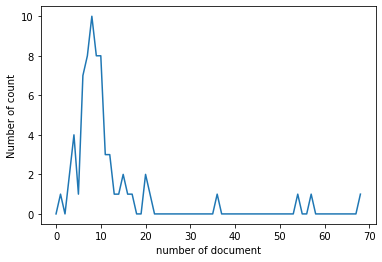

2階層目は1個
3階層目は68個


In [297]:
path_list = get_document_path_list(hlda, corpus)
plot_document_count(path_list, 3)
print_topic_count(path_list, 2)
print_topic_count(path_list, 3)

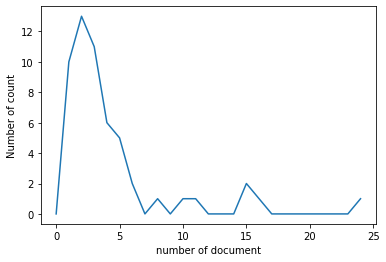

2階層目は5個
3階層目は54個
topic=0 level=0 (documents=793): 運転, 思う, 事故, 高齢者, 免許, 
    topic=1 level=1 (documents=243): ない, 歩道, 思う, 見る, 間違える, 
        topic=2 level=2 (documents=52): 人生, 亡くなる, 最後, 気の毒, 97歳, 
        topic=5 level=2 (documents=35): 踏む, ブレーキ, アクセル, マニュアル車, 間違い, 
        topic=6 level=2 (documents=15): 無駄, 施設, 老人, 人口, ある日, 
        topic=20 level=2 (documents=25): 逮捕, 今回, 飯塚, 警察, 上級国民, 
        topic=33 level=2 (documents=25): サービス, 買い物, 難しい, 公共交通機関, 通院, 
        topic=47 level=2 (documents=10): 道路, 見間, 確保, もたらす, 交付, 
        topic=69 level=2 (documents=29): 走る, 車線, 怖い, 右折, 道路, 
        topic=141 level=2 (documents=7): 自動運転, こえる, 時代, 受け入れる, 浸透, 
        topic=153 level=2 (documents=7): こないだ, 落ちる, 合格, 好き, 2歳, 
        topic=157 level=2 (documents=13): 記録, 警告, 注目, 取り組む, 広い, 
        topic=158 level=2 (documents=8): 無罪, 卒業, 老人ホーム, 正常, 小学生, 
        topic=189 level=2 (documents=9): 補助, 政府, 1時間, 可能性, 向き合う, 
        topic=196 level=2 (documents=5): 年間, 買い替え, 重量, 自動車税, 自賠責, 
        topic=

In [423]:
hlda = load_zipped_pickle('model/2022_11_28/yahoo_hlda_c100_eta01.pickle')
path_list = get_document_path_list(hlda, corpus)
plot_document_count(path_list, 3)
print_topic_count(path_list, 2)
print_topic_count(path_list, 3)
hlda.print_nodes(n_words = 5, with_weights = False)

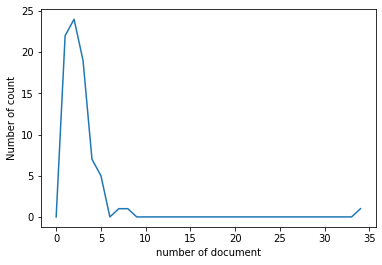

2階層目は6個
3階層目は80個
topic=0 level=0 (documents=793): 運転, 思う, 高齢者, 事故, 免許, 
    topic=1 level=1 (documents=105): 専門家, 運転者, 自覚, 後期高齢者, 自身, 
        topic=168 level=2 (documents=4): 一時, 停止, 踏切, 付ける, 走行, 
        topic=304 level=2 (documents=8): 売る, 常識, 付ける, 同居, 補助, 
        topic=328 level=2 (documents=13): 整形外科, 改善, 支障, 標識, 取り組む, 
        topic=339 level=2 (documents=5): 時計, スマート, 荷物, 地方, 定年制, 
        topic=340 level=2 (documents=7): 受け入れる, ネット, 都合, 改革, 改正, 
        topic=342 level=2 (documents=5): 身体検査, 人殺し, 乗車, 40歳, 囲む, 
        topic=344 level=2 (documents=4): 法律, 義父, 心身, 素早い, 縛る, 
        topic=348 level=2 (documents=8): 件数, 事実, 横ばい, 犯す, 比べる, 
        topic=363 level=2 (documents=8): 相次ぐ, 免許証, 42歳, つらい, 危ぶむ, 
        topic=371 level=2 (documents=8): 警告, 最終的, 用途, 設置, リスク, 
        topic=375 level=2 (documents=7): 無念, 心配, 免許証, 責める, 前方, 
        topic=381 level=2 (documents=14): 年寄り, 家族, 区別, 記録, 弱い, 
        topic=402 level=2 (documents=5): 誰か, 出端, 上限, かな, 事故, 
        topic=405 level=2 (

In [424]:
hlda = load_zipped_pickle('model/2022_11_28/yahoo_hlda_c100_eta025.pickle')
path_list = get_document_path_list(hlda, corpus)
plot_document_count(path_list, 3)
print_topic_count(path_list, 2)
print_topic_count(path_list, 3)
hlda.print_nodes(n_words = 5, with_weights = False)

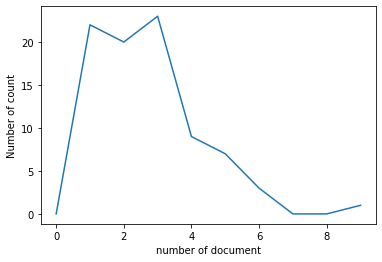

2階層目は3個
3階層目は85個
topic=0 level=0 (documents=793): 運転, 思う, 高齢者, 事故, 免許, 
    topic=1 level=1 (documents=314): 自動車, お子さん, 思える, 乗る, 自治体, 
        topic=6 level=2 (documents=11): 隠す, 都会, 思考, 故障, 満員, 
        topic=11 level=2 (documents=12): 記録, 感覚, マイカー, そのもの, 雇用, 
        topic=14 level=2 (documents=10): バイク, 10年前, こわい, 伝わる, 症状, 
        topic=20 level=2 (documents=6): 息子, ライセンス, 不便, 下限, 人達, 
        topic=43 level=2 (documents=9): 例える, 上の空, 加える, 下回る, 下手, 
        topic=84 level=2 (documents=14): 歩く, 優先, 話す, 乗る, 保持, 
        topic=110 level=2 (documents=8): 無事故, 孤独死, 点字ブロック, 図利, 代わる, 
        topic=115 level=2 (documents=10): 後退, 無罪, 譲る, 鳴らす, 手続き, 
        topic=140 level=2 (documents=7): 母親, 飲食店, つぶやく, のっとる, スピード, 
        topic=153 level=2 (documents=10): 農業, 20年, 80代, 母親, 少ない, 
        topic=154 level=2 (documents=4): 取消, 本当, 両親, 気付く, 大きい, 
        topic=157 level=2 (documents=10): 大幅, 仕方がない, 踏切, 数珠繋ぎ, 環境要因, 
        topic=161 level=2 (documents=9): 可能, 車線, 不可欠, 診察, 特集, 
        topic=

In [427]:
hlda = load_zipped_pickle('model/2022_11_28/yahoo_hlda_c100_eta1.pickle')
path_list = get_document_path_list(hlda, corpus)
plot_document_count(path_list, 3)
print_topic_count(path_list, 2)
print_topic_count(path_list, 3)
hlda.print_nodes(n_words = 5, with_weights = False)

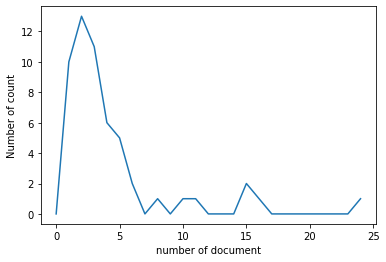

2階層目は5個
3階層目は54個


In [419]:
hlda = load_zipped_pickle('model/2022_11_28/yahoo_hlda_c100_gamma1.pickle')
path_list = get_document_path_list(hlda, corpus)
plot_document_count(path_list, 3)
print_topic_count(path_list, 2)
print_topic_count(path_list, 3)
#hlda.print_nodes(n_words = 5, with_weights = False)

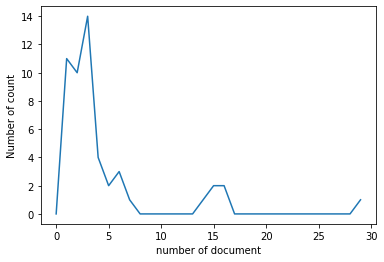

2階層目は6個
3階層目は51個


In [420]:
hlda = load_zipped_pickle('model/2022_11_28/yahoo_hlda_c100_gamma3.pickle')
path_list = get_document_path_list(hlda, corpus)
plot_document_count(path_list, 3)
print_topic_count(path_list, 2)
print_topic_count(path_list, 3)

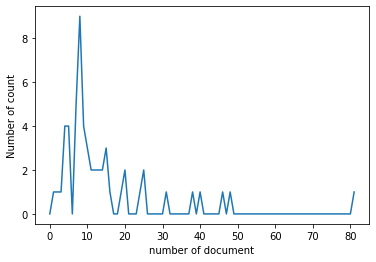

2階層目は6個
3階層目は56個


In [276]:
hlda = load_zipped_pickle('model/2022_11_28/yahoo_hlda_c100_gamma5.pickle')
path_list = get_document_path_list(hlda, corpus)
plot_document_count(path_list, 3)
print_topic_count(path_list, 2)
print_topic_count(path_list, 3)

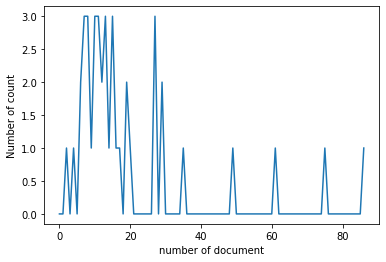

2階層目は4個
3階層目は41個
topic=0 level=0 (documents=793): 高齢者, 事故, 免許, 思う, 運転, 
    topic=5 level=1 (documents=423): 運転, 思う, 問題, できる, 歩道, 
        topic=7 level=2 (documents=61): 歩道, 車道, 道路, 広い, 間違える, 
        topic=19 level=2 (documents=75): 97歳, 人生, 家族, 亡くなる, 最後, 
        topic=37 level=2 (documents=86): 更新, 検査, 試験, 免許更新, 認知機能, 
        topic=60 level=2 (documents=29): 犠牲, 政府, 毎回, おぼつかない, 運動神経, 
        topic=156 level=2 (documents=35): 買い物, サービス, 公共交通機関, 通院, バス停, 
        topic=370 level=2 (documents=11): 無駄, 施設, 人口, 商店街, 移住, 
        topic=415 level=2 (documents=19): 日本, 国民, 政治家, クルマ, 距離, 
        topic=460 level=2 (documents=15): 予算, 土地, 減る, 奥様, 充分, 
        topic=466 level=2 (documents=11): バイク, たくさん, 手段, 怪しい, こわい, 
        topic=526 level=2 (documents=14): メーカー, 自動ブレーキ, 人達, 剥奪, 補助金, 
        topic=530 level=2 (documents=8): 女性, 動く, 身長, 相手, 警官, 
        topic=531 level=2 (documents=9): 車両, 医療機関, 認める, 警察署, 買い替え, 
        topic=539 level=2 (documents=11): 無事故, 運転免許, 日本, 中学生, 卒業, 
        t

In [298]:
hlda = load_zipped_pickle('model/2022_11_28/yahoo_hlda_c100_gamma10.pickle')
path_list = get_document_path_list(hlda, corpus)
plot_document_count(path_list, 3)
print_topic_count(path_list, 2)
print_topic_count(path_list, 3)
#hlda.print_nodes(n_words = 5, with_weights = False)

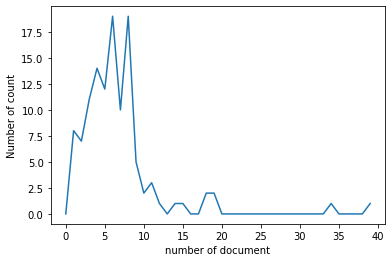

2階層目は4個
3階層目は119個
topic=0 level=0 (documents=793): 思う, 運転, 高齢者, 事故, 免許, 
    topic=1 level=1 (documents=189): 歩道, 車道, 間違える, 走る, 見る, 
        topic=2 level=2 (documents=34): 認知機能, 更新, 免許更新, 1年, 試験, 
        topic=3 level=2 (documents=18): アクセル, 踏む, ブレーキ, マニュアル車, クラッチ, 
        topic=7 level=2 (documents=7): 安全装置, 姓名, 無位, 反省, 名前, 
        topic=10 level=2 (documents=19): 逮捕, 飯塚, 池袋, 警察, 上級国民, 
        topic=1993 level=2 (documents=11): 対向車, 相手, カーブ, 様子, 鳴らす, 
        topic=2766 level=2 (documents=5): 殺す, 論外, あげる, 死ぬ, 田舎, 
        topic=2780 level=2 (documents=4): 通り魔, 早期, ヒステリック, 強制, 特有, 
        topic=2863 level=2 (documents=6): いい, 仕方がない, ポジション, カオス, リスク, 
        topic=2879 level=2 (documents=6): 植え込み, 有る, 土地, 横着, フリ, 
        topic=2938 level=2 (documents=15): メーカー, うち, 方々, 通報, 女性, 
        topic=2955 level=2 (documents=6): 技能試験, メディア, 一日, 着ける, 走る, 
        topic=2956 level=2 (documents=7): 全員, 解釈, すれ違う, 幹線道路, 老若男女, 
        topic=2965 level=2 (documents=5): 毎日, 論理, あと, 思考, 事後, 
    

In [313]:
hlda = load_zipped_pickle('model/2022_11_28/yahoo_hlda_c100_alpha1.pickle')
path_list = get_document_path_list(hlda, corpus)
plot_document_count(path_list, 3)
print_topic_count(path_list, 2)
print_topic_count(path_list, 3)
hlda.print_nodes(n_words = 5, with_weights = False)

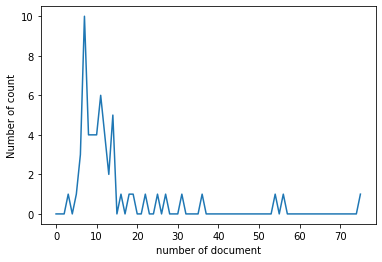

2階層目は5個
3階層目は55個
topic=0 level=0 (documents=793): 思う, 高齢者, 事故, 運転, 免許, 
    topic=1 level=1 (documents=180): 運転, 思う, 見る, 間違える, 車道, 
        topic=2 level=2 (documents=27): 買い物, 難しい, バス停, サービス, 通院, 
        topic=12 level=2 (documents=54): ブレーキ, 踏む, アクセル, 歩道, 間違える, 
        topic=20 level=2 (documents=36): 人生, 最後, 97歳, 生きる, 被害者, 
        topic=22 level=2 (documents=3): 人柄, バラエティ番組, るか, 見せる, 変更, 
        topic=26 level=2 (documents=6): 線引き, 路線バス, 農家, 赤字, 行政サービス, 
        topic=36 level=2 (documents=12): 診断, 件数, メーカー, 政府, 早い, 
        topic=65 level=2 (documents=9): 保持, 皆さん, 通り魔, いつまでも, 話題, 
        topic=97 level=2 (documents=8): 場合, 頻繁, 時計, スマート, 荷物, 
        topic=100 level=2 (documents=16): 驚く, 記録, 不安, 安全装置, 防げる, 
        topic=101 level=2 (documents=9): 身体検査, サポカー, 言語道断, 40歳, 達す, 
    topic=3 level=1 (documents=260): 運転, 歩道, 間違える, 思う, 言う, 
        topic=4 level=2 (documents=75): 更新, 免許, 試験, 免許更新, 検査, 
        topic=8 level=2 (documents=19): お子さん, 母親, お母さん, 子供, 小学生, 
        topic=10 

In [322]:
hlda = load_zipped_pickle('model/2022_11_28/yahoo_hlda_c100_alpha20.pickle')
path_list = get_document_path_list(hlda, corpus)
plot_document_count(path_list, 3)
print_topic_count(path_list, 2)
print_topic_count(path_list, 3)
hlda.print_nodes(n_words = 5, with_weights = False)

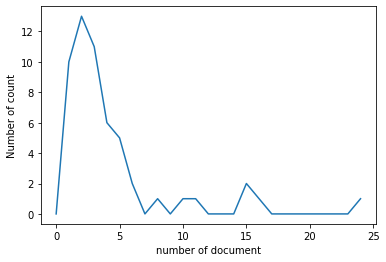

2階層目は5個
3階層目は54個
topic=0 level=0 (documents=793): 運転, 思う, 事故, 高齢者, 免許, 
    topic=1 level=1 (documents=243): ない, 歩道, 思う, 見る, 間違える, 
        topic=2 level=2 (documents=52): 人生, 亡くなる, 最後, 気の毒, 97歳, 
        topic=5 level=2 (documents=35): 踏む, ブレーキ, アクセル, マニュアル車, 間違い, 
        topic=6 level=2 (documents=15): 無駄, 施設, 老人, 人口, ある日, 
        topic=20 level=2 (documents=25): 逮捕, 今回, 飯塚, 警察, 上級国民, 
        topic=33 level=2 (documents=25): サービス, 買い物, 難しい, 公共交通機関, 通院, 
        topic=47 level=2 (documents=10): 道路, 見間, 確保, もたらす, 交付, 
        topic=69 level=2 (documents=29): 走る, 車線, 怖い, 右折, 道路, 
        topic=141 level=2 (documents=7): 自動運転, こえる, 時代, 受け入れる, 浸透, 
        topic=153 level=2 (documents=7): こないだ, 落ちる, 合格, 好き, 2歳, 
        topic=157 level=2 (documents=13): 記録, 警告, 注目, 取り組む, 広い, 
        topic=158 level=2 (documents=8): 無罪, 卒業, 老人ホーム, 正常, 小学生, 
        topic=189 level=2 (documents=9): 補助, 政府, 1時間, 可能性, 向き合う, 
        topic=196 level=2 (documents=5): 年間, 買い替え, 重量, 自動車税, 自賠責, 
        topic=

In [421]:
hlda = load_zipped_pickle('model/2022_11_28/yahoo_hlda_c100_alpha10.pickle')
path_list = get_document_path_list(hlda, corpus)
plot_document_count(path_list, 3)
print_topic_count(path_list, 2)
print_topic_count(path_list, 3)
hlda.print_nodes(n_words = 5, with_weights = False)

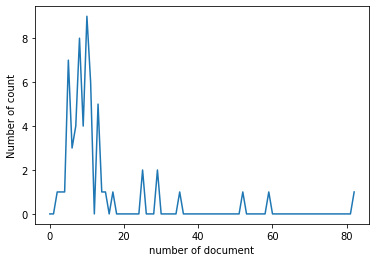

2階層目は5個
3階層目は60個
topic=0 level=0 (documents=793): 運転, 思う, 事故, 高齢者, 免許, 
    topic=1 level=1 (documents=243): ない, 歩道, 思う, 見る, 間違える, 
        topic=2 level=2 (documents=52): 人生, 亡くなる, 最後, 気の毒, 97歳, 
        topic=5 level=2 (documents=35): 踏む, ブレーキ, アクセル, マニュアル車, 間違い, 
        topic=6 level=2 (documents=15): 無駄, 施設, 老人, 人口, ある日, 
        topic=20 level=2 (documents=25): 逮捕, 今回, 飯塚, 警察, 上級国民, 
        topic=33 level=2 (documents=25): サービス, 買い物, 難しい, 公共交通機関, 通院, 
        topic=47 level=2 (documents=10): 道路, 見間, 確保, もたらす, 交付, 
        topic=69 level=2 (documents=29): 走る, 車線, 怖い, 右折, 道路, 
        topic=141 level=2 (documents=7): 自動運転, こえる, 時代, 受け入れる, 浸透, 
        topic=153 level=2 (documents=7): こないだ, 落ちる, 合格, 好き, 2歳, 
        topic=157 level=2 (documents=13): 記録, 警告, 注目, 取り組む, 広い, 
        topic=158 level=2 (documents=8): 無罪, 卒業, 老人ホーム, 正常, 小学生, 
        topic=189 level=2 (documents=9): 補助, 政府, 1時間, 可能性, 向き合う, 
        topic=196 level=2 (documents=5): 年間, 買い替え, 重量, 自動車税, 自賠責, 
        topic=

In [339]:
hlda = load_zipped_pickle('model/2022_11_22/yahoo_hlda_default_20221122_No1.pickle')
path_list = get_document_path_list(hlda, corpus)
plot_document_count(path_list, 3)
print_topic_count(path_list, 2)
print_topic_count(path_list, 3)
hlda.print_nodes(n_words = 5, with_weights = False)

In [348]:
hlda = load_zipped_pickle('model/2022_11_15/yahoo_hlda_default.pickle')
path_list = get_document_path_list(hlda, corpus)
plot_document_count(path_list, 3)
print_topic_count(path_list, 2)
print_topic_count(path_list, 3)
hlda.print_nodes(n_words = 5, with_weights = False)

KeyError: 456

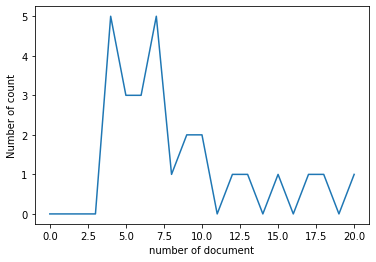

2階層目は6個
3階層目は27個
topic=0 level=0 (documents=229): 思う, 運転, 事故, 高齢者, 免許, 
    topic=1 level=1 (documents=38): 家族, 機能, 亡くなる, 奪う, 期間, 
        topic=2 level=2 (documents=18): お子さん, 毎日, 説得, 遺族, 最後, 
        topic=12 level=2 (documents=20): 認知機能, 検査, 低下, 診断, 有効, 
    topic=3 level=1 (documents=46): 間違い, 衰える, 子供, 車両, 怪我, 
        topic=4 level=2 (documents=15): 踏む, アクセル, ブレーキ, 歩ける, 能力, 
        topic=16 level=2 (documents=6): 提供, サービス, 年寄り, 施設, 活用, 
        topic=24 level=2 (documents=7): 人生, 人殺し, 最後, ミニカー, 年間, 
        topic=32 level=2 (documents=4): 無人, 父親, タクシーチケット, イヤ, 署員, 
        topic=49 level=2 (documents=10): 見える, 運転, 進入, 状態, 速度, 
        topic=56 level=2 (documents=4): 逮捕, 飯塚, 当時, 司法, 爺さん, 
    topic=5 level=1 (documents=26): いい, 講習, リスク, 75歳, 義務付ける, 
        topic=6 level=2 (documents=4): 上げる, 居住区, 高まる, 減退, 行政サービス, 
        topic=13 level=2 (documents=9): 時計, 頻繁, 値する, 帰る, スマート, 
        topic=54 level=2 (documents=13): 試験, 認知, 年寄り, 更新, 毎年, 
    topic=7 level=1 (documents=70): 走る, わ

In [344]:
hlda = load_zipped_pickle('model/2022_11_24/yahoo_hlda_default_20221124_No1.pickle')
path_list = get_document_path_list(hlda, corpus)
plot_document_count(path_list, 3)
print_topic_count(path_list, 2)
print_topic_count(path_list, 3)
hlda.print_nodes(n_words = 5, with_weights = False)